## 0. initialization

In [ ]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar
import datetime
from datetime import datetime, timedelta, date
import warnings
import os

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import ensemble
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#settings
pd.set_option('display.max_row', 100)
pd.set_option('display.max_columns', 1200)
pd.set_option('display.width', 1200)
warnings.filterwarnings("ignore")
%matplotlib inline

#variables
colour=['maroon','r','g','darkgreen','c','teal','b','navy','indigo','m','deeppink','orange','sienna','yellow','khaki','olive','tan','black','grey','brown']

print("Packages installed")

Packages installed


In [ ]:
file_path = '/work/17_02_2024_cleaned_Data.csv'
df = pd.read_csv(file_path, sep=",", encoding="UTF-8")
file_path = '/work/RawData/clubs.csv'
clubs_df = pd.read_csv(file_path, sep=",", encoding="UTF-8")
#df.drop(columns=['player_club_id.1'], inplace=True)
df.rename(columns={'player_club_id': 'club_id'}, inplace=True)
#clubs_df.rename(columns={'name': 'club_name'}, inplace=True)
df = pd.merge(df, clubs_df[['club_id', 'name']], on='club_id', how='left')
print(df)
print(clubs_df)

        player_id country_of_birth country_of_citizenship date_of_birth  height_in_cm        sub_position                 player_name  club_id  goals  assists  red_cards  yellow_cards  minutes_played    year semester        date  market_value_in_eur  age_at_evaluation                                          name
0              10           Poland                Germany    1978-06-09         184.0      Centre-Forward              Miroslav Klose    398.0   11.0      1.0        0.0           6.0          1483.0  2012.0     Fall  2013-01-14            4000000.0                 35                 Società Sportiva Lazio S.p.A.
1              10           Poland                Germany    1978-06-09         184.0      Centre-Forward              Miroslav Klose    398.0    5.0      2.0        0.0           2.0          1102.0  2013.0   Spring  2013-06-19            2000000.0                 35                 Società Sportiva Lazio S.p.A.
2              10           Poland                Germa

# 1. Sum club total values and plot

In [ ]:
# Assuming your DataFrame is named df and the column with the player evaluations is named 'market_value_in_eur'
# Assuming the column with the club IDs is named 'club_id'
# Assuming the DataFrame with club names is named clubs_df and the column with the club names is named 'club_name'

# Group the data by 'club_id' and sum the player evaluations for each club
club_values = df.groupby(['club_id', 'year']).agg({"market_value_in_eur" : "sum"}).reset_index()

club_values.rename(columns = {"market_value_in_eur" : "club_value"}, inplace = True)

# Sort the clubs by total value in descending order
club_values_sorted = club_values.sort_values("club_value", ascending=False)

# Get the club names from clubs_df
club_names = clubs_df.set_index('club_id')['name']




KeyError: '[532, 1371, 1373, 966, 55, 178, 1760, 74, 534, 1758, 76, 181, 1575, 965, 1376, 1755, 963, 1657, 176, 1652, 1653, 537, 203, 1375, 2226, 594, 967, 593, 316, 1655, 2229, 1656, 2228, 103, 205, 1759, 597, 1573, 2225, 4061, 596, 2224, 1757, 179, 177, 536, 1372, 1654, 1756, 1369, 53, 75, 4613, 592, 54, 77, 52, 201, 1574, 529, 1374, 1370, 530, 1576, 531, 535, 78, 1651, 4064, 1969, 104, 32, 962, 106, 319, 4060, 174, 102, 1367, 101, 1368, 1366, 50, 51, 1577, 35, 94, 4062, 591, 4615, 1571, 314, 4616, 315, 191, 4612, 34, 527, 2223, 4059, 2291, 2738, 64, 1718, 318, 4614, 1852, 1572, 1174, 961, 4063, 1299, 2222, 1224, 2403, 175, 1993, 91, 528, 1640, 48, 1754, 72, 30, 1578, 1753, 1752, 1639, 1720, 1637, 999, 1222, 2290, 996, 1300, 1650, 1855, 1638, 49, 1968, 2402, 93, 1223, 2384, 73, 1994, 1721, 2383, 189, 960, 590, 193, 92, 115, 1750, 2401, 100, 62, 1854, 1895, 4057, 2386, 63, 1175, 4611, 938, 1719, 90, 638, 188, 1220, 2405, 2382, 2289, 958, 639, 998, 2220, 1649, 1996, 1263, 644, 2619, 4058, 1172, 1751, 1404, 643, 199, 66, 606, 959, 1930, 99, 1570, 1070, 572, 2416, 1853, 2221, 1636, 2737, 1995, 2116, 831, 116, 2385, 312, 2415, 313, 2479, 1717, 721, 67, 640, 1928, 1242, 1221, 2387, 1274, 154, 937, 2417, 2618, 997, 171, 1648, 1851, 2251, 1069, 2736, 1623, 98, 1722, 1298, 1406, 1850, 158, 935, 2480, 1273, 2078, 1363, 2219, 1364, 2478, 1743, 1176, 1967, 1929, 4610, 1568, 1362, 304, 2255, 45, 1625, 113, 587, 1647, 719, 1931, 1170, 61, 1927, 198, 1405, 2399, 4056, 1992, 1569, 69, 4100, 2482, 4054, 1624, 1173, 213, 994, 867, 2398, 526, 187, 1261, 2406, 311, 1068, 2252, 397, 1741, 2077, 3760, 1067, 608, 97, 1403, 863, 1365, 186, 117, 1745, 1407, 155, 1926, 2481, 864, 1402, 1966, 2157, 1746, 214, 2151, 2075, 87, 402, 1066, 88, 936, 197, 59, 866, 404, 153, 4055, 401, 1264, 1219, 1965, 1266, 2021, 722, 386, 2404, 1349, 28, 2412, 96, 716, 156, 215, 588, 1115, 3027, 118, 2136, 715, 2400, 609, 71, 196, 946, 233, 1171, 1352, 310, 523, 303, 1240, 717, 1262, 4424, 990, 718, 2329, 1626, 992, 2735, 2846, 1361, 3026, 1065, 2138, 604, 25, 1169, 2734, 637, 957, 1744, 4101, 4103, 1351, 26, 212, 3087, 1260, 1265, 1742, 1348, 1275, 1456, 2380, 636, 1064, 1217, 1238, 1360, 571, 2413, 452, 185, 2156, 2326, 1400, 211, 3029, 3028, 426, 111, 1921, 830, 2250, 2308, 1991, 1239, 4099, 302, 2309, 1258, 1401, 1323, 1397, 2218, 210, 384, 1218, 1350, 3093, 305, 3762, 70, 3025, 2114, 2465, 2361, 2608, 57, 570, 2158, 1399, 2076, 1924, 351, 2152, 2074, 2589, 170, 381, 1359, 1398, 1326, 1925, 309, 876, 4500, 2137, 1749, 2362, 400, 934, 3667, 2310, 209, 2682, 2411, 1324, 816, 2363, 1990, 1628, 2397, 2606, 1799, 450, 2630, 2522, 2020, 1916, 1259, 2879, 2396, 396, 1716, 828, 2178, 1914, 2525, 1347, 261, 2141, 713, 1816, 112, 2847, 1212, 349, 1358, 2115, 2845, 829, 1915, 2327, 2604, 1959, 1167, 184, 2153, 2468, 991, 3761, 2160, 1849, 1594, 1454, 635, 1297, 875, 2328, 2154, 1453, 1062, 251, 1595, 1740, 2287, 1800, 183, 3091, 1964, 1732, 4098, 208, 947, 664, 2379, 1802, 663, 1325, 85, 1052, 262, 2159, 665, 2155, 414, 451, 1845, 2878, 2605, 2680, 2139, 1346, 460, 3035, 1864, 1257, 249, 1794, 2733, 348, 1168, 1622, 2072, 2286, 250, 2125, 2176, 1731, 4096, 2360, 1256, 2617, 1061, 2073, 254, 2678, 2140, 817, 948, 1151, 1715, 1216, 668, 859, 861, 2681, 2467, 3759, 1567, 1739, 2752, 2523, 2603, 2280, 1793, 333, 227, 1798, 1738, 1923, 3034, 2844, 1635, 1846, 3313, 2566, 335, 857, 1646, 1961, 2124, 1336, 1051, 484, 2213, 2307, 562, 2119, 814, 226, 2521, 3088, 1116, 563, 110, 2279, 3092, 2111, 1060, 1340, 2466, 569, 2275, 3763, 3668, 815, 231, 4487, 1081, 4488, 84, 568, 2277, 445, 1236, 1797, 1848, 425, 1952, 522, 2876, 2576, 1080, 253, 1736, 1866, 1209, 933, 4419, 3448, 3033, 1345, 846, 4486, 810, 2217, 3089, 860, 2679, 444, 2364, 224, 2306, 1960, 2249, 2177, 2019, 68, 712, 3094, 586, 483, 225, 1235, 849, 2565, 2276, 1733, 2865, 1230, 419, 446, 1272, 874, 1815, 3024, 3031, 1813, 1918, 1165, 4485, 1322, 195, 871, 827, 1737, 625, 977, 2877, 2135, 1234, 1086, 4490, 1593, 14, 2112, 3086, 2175, 949, 109, 8, 1079, 1321, 877, 3638, 2071, 3624, 564, 2126, 2377, 95, 1714, 2278, 4501, 622, 2590, 2212, 2358, 2864, 1951, 1847, 872, 1619, 2464, 346, 230, 1291, 1812, 1712, 1293, 263, 1207, 1730, 337, 3096, 1621, 2524, 1337, 2128, 2325, 819, 1102, 4097, 3665, 3666, 2751, 2564, 332, 2602, 858, 228, 469, 3758, 2150, 980, 1795, 3572, 2299, 308, 1859, 2378, 2677, 2463, 3834, 1211, 264, 2496, 4483, 3032, 4144, 1725, 928, 2588, 2134, 2113, 4143, 334, 241, 1713, 3833, 4146, 2254, 1796, 2357, 2359, 2498, 1863, 1357, 4053, 2209, 2591, 2173, 3835, 3095, 2149, 2875, 2472, 2750, 2174, 1317, 3118, 447, 2974, 1814, 2629, 466, 260, 1867, 666, 3511, 1215, 3573, 565, 7, 330, 2476, 461, 301, 620, 1865, 1922, 4481, 813, 2248, 1620, 1078, 3090, 848, 2120, 482, 247, 2972, 870, 1118, 329, 2324, 229, 1727, 423, 1232, 818, 3023, 377, 2534, 2867, 1792, 2607, 2133, 1596, 424, 1316, 2211, 1468, 345, 1989, 1214, 3839, 634, 1320, 2409, 1448, 1164, 1092, 2214, 395, 2473, 2376, 567, 4484, 1726, 442, 2628, 2312, 3022, 2365, 1229, 3470, 1811, 4095, 2866, 1945, 1729, 4145, 1114, 879, 1310, 2520, 4392, 2123, 2962, 3330, 1860, 216, 1858, 3711, 1335, 3021, 1292, 1592, 2084, 2311, 481, 378, 1861, 3155, 3574, 2582, 1447, 869, 3036, 1452, 248, 4073, 3712, 2552, 856, 1343, 3713, 1446, 258, 448, 3085, 519, 1913, 300, 978, 3309, 1728, 271, 2491, 4094, 2563, 1150, 3308, 382, 2395, 2322, 2676, 1958, 3819, 1516, 2843, 1342, 1344, 1319, 259, 3169, 2567, 930, 824, 1033, 268, 3472, 1618, 2533, 2461, 2458, 207, 1101, 1318, 1591, 2643, 518, 3571, 2857, 413, 2107, 376, 2545, 2499, 108, 1331, 2675, 811, 1208, 2973, 2863, 3576, 1912, 2210, 3286, 2984, 1944, 56, 878, 2636, 2537, 1987, 125, 733, 2460, 623, 4489, 2356, 3471, 256, 812, 2127, 662, 602, 4609, 409, 2848, 2474, 149, 411, 2500, 2168, 3328, 1233, 1088, 412, 3753, 246, 2070, 1963, 2274, 2577, 823, 3818, 2297, 2459, 1910, 2285, 619, 3623, 2462, 277, 9, 245, 1396, 2858, 1919, 2625, 2216, 1911, 809, 2475, 298, 2635, 2060, 1988, 1449, 773, 3312, 1986, 4493, 2085, 2121, 4495, 3287, 1166, 617, 2497, 267, 3305, 223, 2122, 822, 1515, 1801, 3514, 4394, 2471, 1023, 2551, 2061, 182, 1917, 391, 270, 2550, 1862, 3716, 392, 3569, 1255, 1669, 1735, 2319, 341, 2337, 1157, 1909, 4110, 661, 342, 2839, 3838, 2971, 3019, 4496, 3120, 83, 624, 2172, 731, 3567, 282, 3566, 599, 4142, 2535, 2132, 770, 4269, 4423, 1469, 272, 1156, 3447, 3020, 2083, 929, 4494, 1334, 3055, 3715, 1610, 1087, 4112, 3575, 4139, 299, 4393, 1763, 2637, 2622, 1450, 2408, 242, 257, 3304, 3397, 2041, 2068, 3639, 1020, 278, 3604, 695, 2369, 1547, 2732, 821, 981, 3054, 1948, 2532, 4502, 4315, 3156, 945, 2062, 735, 3285, 2494, 2936, 3117, 1950, 1556, 3342, 3173, 151, 2536, 3119, 4313, 915, 4744, 3669, 2519, 3300, 1154, 129, 3147, 1734, 771, 4503, 3166, 732, 561, 2487, 1451, 1764, 1338, 3754, 2961, 4207, 3570, 1693, 4140, 1354, 1332, 2673, 4223, 808, 2492, 2518, 1024, 3979, 2166, 4141, 1202, 1520, 2529, 3641, 3053, 2840, 3299, 2975, 1690, 1339, 2549, 2490, 2446, 2970, 307, 3081, 2495, 2849, 3301, 4391, 2059, 2305, 2624, 3429, 269, 3602, 2045, 4074, 2131, 2048, 2046, 3306, 2546, 1290, 769, 480, 4314, 1103, 1044, 4312, 4306, 3660, 3661, 2493, 4420, 3015, 1356, 3121, 4225, 1161, 1017, 3442, 3513, 2171, 3755, 2018, 3030, 1315, 2749, 2517, 2117, 4111, 2584, 2569, 2531, 1667, 1016, 696, 3798, 4810, 1553, 694, 3603, 2674, 1857, 3457, 3568, 2528, 1710, 2169, 1549, 1954, 2321, 1709, 2042, 3836, 1668, 3640, 459, 4307, 927, 1555, 2623, 3168, 4138, 1333, 2963, 783, 4224, 3115, 2881, 2044, 2272, 2003, 1018, 1330, 2366, 2515, 1551, 2368, 734, 1671, 394, 3164, 2167, 1152, 1548, 659, 697, 2957, 3222, 767, 2170, 2872, 2627, 698, 1445, 2049, 3662, 2012, 1149, 3788, 2367, 1692, 3307, 3165, 2485, 784, 1213, 1355, 2002, 2047, 1844, 3473, 2273, 1145, 3303, 1204, 914, 847, 1590, 2489, 3116, 2040, 4208, 768, 218, 4305, 1014, 2208, 3786, 2013, 772, 3082, 3114, 3138, 2488, 4450, 3785, 493, 2871, 766, 1026, 2271, 2862, 845, 2247, 2868, 908, 3980, 2445, 4390, 1512, 1203, 217, 408, 4308, 2355, 134, 2038, 4643, 255, 3977, 1015, 2960, 1098, 1552, 2118, 729, 1130, 3784, 3284, 3145, 2568, 1663, 3083, 941, 521, 3074, 3430, 1724, 1129, 2106, 2516, 2501, 1606, 492, 2086, 1941, 2069, 3431, 3438, 3014, 909, 2874, 2005, 2642, 3594, 693, 2575, 2530, 2562, 3113, 2997, 3510, 21, 479, 1550, 939, 711, 4404, 4544, 2940, 2014, 328, 1163, 3949, 3137, 3469, 1466, 3075, 2039, 3787, 2601, 1525, 2859, 1013, 280, 3752, 3225, 3223, 3340, 3394, 3052, 1384, 1027, 2870, 3782, 3791, 907, 2004, 781, 801, 1557, 3797, 3048, 3437, 1607, 1608, 1131, 375, 3084, 4373, 3693, 517, 2985, 1947, 1711, 4543, 4745, 4671, 1705, 2641, 2407, 2298, 1662, 3298, 3832, 107, 3154, 2758, 843, 1612, 1517, 780, 2930, 3978, 728, 3796, 3700, 2640, 1540, 4209, 2058, 3865, 3174, 3163, 3817, 3224, 1205, 3172, 3694, 4497, 4492, 1019, 2807, 1201, 4093, 1946, 3710, 1985, 912, 2713, 3142, 1908, 616, 3439, 1153, 3458, 4641, 2935, 1011, 3597, 3314, 1030, 3697, 4642, 2924, 2486, 1048, 2931, 491, 777, 2108, 1529, 1284, 1012, 279, 2621, 615, 1666, 3127, 3868, 4451, 3047, 266, 3893, 1502, 944, 1856, 3699, 2581, 3485, 3601, 658, 782, 1920, 2923, 2939, 2800, 3076, 4535, 1659, 3146, 3141, 2925, 988, 3395, 3428, 344, 2644, 2983, 3494, 17, 3341, 1388, 2819, 763, 1614, 799, 4746, 2548, 3790, 2191, 4148, 3144, 3789, 2544, 690, 2841, 598, 2296, 436, 730, 1684, 765, 4418, 4268, 1962, 3296, 4388, 3598, 464, 1554, 4747, 779, 3620, 3393, 487, 3488, 4310, 4653, 486, 3756, 2057, 4267, 432, 1673, 4210, 1686, 3637, 2610, 1613, 4672, 1231, 2780, 1609, 4372, 1126, 3295, 22, 3049, 4368, 1672, 2105, 3167, 727, 4533, 3799, 275, 3112, 2801, 2318, 2762, 2082, 2856, 4534, 2200, 778, 4829, 4389, 355, 1615, 3698, 297, 3292, 2958, 3487, 3701, 1943, 240, 3396, 3441, 574, 3453, 4460, 4309, 2802, 3129, 1526, 3440, 4243, 1687, 2820, 2818, 2638, 1524, 2838, 3866, 1539, 2543, 2933, 1704, 793, 2842, 2081, 488, 1617, 3663, 3046, 3111, 3316, 1282, 2712, 2190, 343, 1353, 692, 4480, 4640, 495, 1104, 340, 942, 3890, 2065, 2050, 4749, 3867, 1341, 3892, 3051, 776, 4367, 725, 795, 3080, 1685, 1791, 2037, 2804, 3696, 3493, 1022, 4499, 3162, 1285, 4333, 3449, 422, 943, 3050, 796, 4311, 2805, 797, 2199, 2027, 1047, 3443, 764, 3143, 3452, 3600, 3837, 147, 4457, 2268, 2284, 3781, 4479, 4371, 3195, 4536, 2769, 2779, 4830, 910, 2009, 4376, 1683, 3126, 3479, 3456, 4740, 2937, 3450, 4211, 462, 842, 3889, 4542, 2781, 2880, 2339, 1544, 2757, 2777, 1254, 4369, 2968, 3079, 4458, 726, 1541, 2506, 390, 3628, 3776, 2130, 2803, 1100, 2054, 4116, 3153, 775, 2507, 1841, 2188, 2080, 1125, 906, 2756, 4541, 4135, 1523, 3876, 4652, 1155, 3492, 4329, 2934, 1840, 1810, 4238, 3018, 573, 494, 2006, 3783, 4370, 1496, 2043, 913, 3664, 1694, 1043, 4328, 1546, 500, 2956, 4654, 1097, 3517, 2835, 1528, 1681, 2505, 600, 2267, 3128, 2066, 3565, 2817, 1680, 1381, 4195, 4831, 3882, 2626, 2320, 2766, 3140, 3875, 2055, 3489, 3757, 3436, 243, 1253, 2821, 1099, 1953, 4374, 1984, 3148, 1664, 3627, 2198, 1674, 2926, 4331, 1250, 2426, 2508, 3599, 2782, 3605, 2927, 1527, 4266, 2585, 3884, 357, 1843, 4330, 295, 4655, 691, 4452, 3221, 2201, 4212, 2767, 3831, 3621, 1522, 1197, 2098, 911, 3481, 1279, 3777, 2770, 3196, 2270, 2761, 4669, 3480, 2103, 1702, 3132, 1679, 1146, 4639, 2873, 904, 785, 1542, 3317, 1093, 3695, 1046, 4375, 3644, 497, 2527, 2338, 4334, 1661, 3593, 1611, 2542, 3135, 3596, 4828, 3795, 2192, 544, 1280, 4265, 4239, 2816, 1682, 2771, 4137, 2808, 1311, 2748, 4115, 2504, 4670, 3486, 168, 3219, 3161, 3194, 1281, 4668, 2165, 1842, 1076, 1770, 2261, 3218, 2101, 3310, 3073, 1665, 792, 501, 1470, 2913, 2631, 4155, 4638, 1305, 2834, 2768, 3702, 3289, 4403, 3583, 1144, 2776, 1501, 1940, 4784, 794, 2011, 4467, 2428, 1981, 3595, 3950, 1509, 2815, 1677, 1000, 1670, 3830, 788, 1787, 1510, 4332, 4237, 2056, 983, 4336, 1514, 657, 4364, 1543, 4809, 3220, 1521, 4196, 3584, 2632, 3588, 3344, 2658, 689, 3659, 3391, 1128, 3619, 4667, 1200, 1678, 3345, 4518, 4644, 4783, 2001, 4304, 2813, 2186, 4808, 3136, 841, 3392, 4136, 1122, 1379, 707, 474, 3346, 2509, 4193, 3318, 3780, 4154, 2540, 2860, 463, 3618, 4651, 1493, 2941, 3580, 362, 4327, 3297, 2510, 2806, 3217, 2187, 3680, 2587, 3311, 1703, 1228, 4004, 2053, 2765, 2809, 2853, 3885, 3063, 2895, 2442, 688, 2189, 3150, 4117, 2896, 630, 3400, 4005, 1658, 4537, 2764, 161, 4449, 3201, 1511, 3039, 3631, 2888, 4649, 4405, 4532, 2102, 4172, 4109, 2938, 3939, 1386, 840, 674, 3579, 1701, 3913, 3435, 3043, 2253, 2015, 3427, 1600, 2016, 2592, 3931, 4807, 2100, 3339, 2869, 3335, 3157, 787, 3291, 2341, 3883, 4194, 3323, 4650, 4167, 2795, 709, 1905, 2929, 2943, 1839, 3655, 1009, 3912, 3585, 1309, 1196, 2067, 2659, 2794, 2526, 2889, 4743, 3864, 2609, 2912, 4153, 4387, 1980, 2017, 3629, 3645, 3072, 4242, 2633, 3071, 1029, 2427, 1195, 3348, 1675, 737, 3294, 3131, 1605, 4727, 1508, 1602, 1198, 4179, 4156, 1059, 1127, 3900, 2634, 4748, 2583, 1790, 4192, 2028, 3468, 2008, 4353, 2483, 2484, 1789, 559, 708, 431, 3062, 675, 4648, 4149, 1307, 3686, 3607, 1691, 2541, 3290, 4006, 2547, 1978, 1199, 236, 4119, 3582, 4080, 3130, 2421, 3720, 2775, 3203, 3350, 4118, 507, 4030, 2163, 3775, 4175, 291, 4673, 2599, 3265, 4815, 3234, 4545, 4121, 4003, 4191, 3264, 2010, 2639, 741, 3390, 3581, 539, 1536, 3643, 2064, 839, 3267, 673, 489, 2162, 4178, 1028, 3968, 4081, 1783, 1818, 4569, 292, 1660, 3351, 4770, 1495, 433, 672, 2890, 3321, 838, 2612, 2932, 4082, 706, 2928, 1045, 702, 4075, 3003, 740, 4206, 4157, 4517, 4088, 3266, 3077, 3745, 2242, 4468, 1979, 4814, 3444, 1616, 4570, 4812, 4606, 3606, 4159, 361, 4177, 2772, 2539, 4158, 2052, 3315, 4079, 1188, 144, 4762, 2194, 2184, 3277, 2613, 4147, 4459, 1249, 3656, 1786, 710, 1464, 676, 510, 3202, 3045, 3322, 4666, 3387, 4166, 3399, 614, 4085, 3204, 4002, 3608, 3495, 3682, 1545, 4602, 3998, 4240, 3459, 1252, 485, 3254, 3353, 3388, 2814, 2193, 2240, 2942, 905, 4521, 4796, 552, 4031, 2026, 4326, 509, 4170, 1377, 760, 3276, 4120, 3886, 4685, 2755, 4029, 3880, 1312, 2538, 3389, 2422, 3193, 4832, 3930, 4363, 2905, 4087, 3133, 3288, 4519, 3587, 3928, 4540, 4335, 2891, 2099, 3235, 3687, 4730, 3078, 3724, 3681, 4514, 3200, 2953, 4466, 3929, 4765, 1251, 4601, 3002, 2914, 135, 3293, 791, 1036, 4222, 4734, 1887, 165, 3914, 2202, 4456, 4656, 4197, 3851, 1838, 1415, 3272, 704, 3010, 1584, 3730, 4552, 2823, 4515, 2007, 2796, 2146, 700, 4124, 2686, 490, 4516, 4173, 1185, 4027, 540, 4202, 3134, 1483, 3236, 3347, 1564, 3692, 4084, 705, 4474, 4123, 2237, 3373, 2954, 3343, 4201, 4551, 2429, 3004, 1538, 3149, 1537, 3239, 1875, 3965, 3401, 1893, 2419, 1500, 3800, 684, 1836, 3881, 4604, 4000, 3206, 2746, 3278, 4165, 508, 3642, 3337, 3997, 1982, 2241, 1463, 3769, 3703, 2514, 701, 2822, 4659, 3338, 1432, 4571, 1433, 1488, 3257, 4645, 2063, 3105, 3273, 3258, 2161, 4572, 4507, 3577, 356, 1833, 3256, 321, 4637, 2185, 578, 4726, 2238, 4040, 3626, 37, 3434, 4605, 4176, 2745, 3630, 1642, 3125, 3361, 1121, 1481, 3370, 1835, 671, 3363, 3106, 3352, 1182, 3899, 3320, 1983, 2882, 1788, 4072, 654, 2586, 1837, 3657, 1193, 853, 4430, 2304, 756, 4763, 3500, 4801, 4658, 4768, 3683, 3259, 1482, 4739, 3721, 2798, 3490, 560, 1462, 2744, 4618, 1507, 1434, 2785, 3104, 3610, 3768, 2852, 2653, 3617, 4001, 3255, 4036, 4174, 2691, 4028, 1562, 3737, 2095, 3794, 2205, 4113, 1492, 1939, 4361, 2946, 1645, 3279, 4475, 2810, 1603, 3271, 3044, 4731, 1286, 4026, 2854, 3848, 3746, 3103, 2887, 2692, 1934, 2797, 3847, 4455, 4725, 2600, 2611, 1491, 1597, 163, 923, 3108, 4782, 4362, 2743, 545, 4429, 3902, 4261, 3372, 2657, 3197, 457, 4473, 4160, 774, 3319, 1480, 4508, 581, 891, 1644, 3249, 2911, 3042, 742, 3969, 1676, 3491, 140, 3996, 2370, 755, 3159, 4724, 2373, 3736, 837, 656, 739, 3846, 2947, 2206, 1497, 477, 2784, 1136, 2437, 4806, 558, 4039, 3151, 1700, 1313, 1077, 4513, 3229, 2573, 4025, 3622, 4733, 286, 1775, 1190, 2182, 3280, 4794, 1474, 3324, 2883, 3850, 2906, 1873, 757, 2204, 2955, 3586, 143, 2656, 2952, 2232, 2793, 3371, 288, 4428, 3454, 4454, 166, 164, 1955, 1565, 4241, 3502, 1773, 2164, 1772, 4631, 3778, 1768, 4365, 239, 679, 1380, 2374, 3983, 3518, 4509, 3198, 2438, 1505, 3250, 789, 2763, 4024, 3274, 790, 4122, 541, 4776, 2742, 2104, 3922, 293, 1278, 4472, 1699, 1294, 2349, 687, 2203, 1774, 3433, 745, 3386, 1412, 4520, 4813, 4547, 4260, 4190, 1192, 4270, 1825, 1885, 1008, 1766, 3654, 504, 4818, 1697, 2313, 2812, 1823, 3380, 1479, 4169, 3501, 2598, 2655, 505, 2440, 677, 4023, 320, 3270, 3793, 3406, 4820, 1191, 3238, 4086, 4811, 3705, 2884, 4152, 1604, 1696, 2907, 3482, 4465, 1417, 4114, 4767, 1601, 1977, 1428, 3963, 786, 4531, 1785, 1306, 580, 1385, 1598, 4168, 358, 4568, 4538, 1187, 4583, 1328, 3282, 1277, 1822, 3283, 4827, 4041, 2233, 4764, 3262, 736, 4199, 893, 554, 503, 3334, 1414, 4471, 1832, 669, 1425, 4600, 1886, 1431, 2908, 3684, 3849, 287, 4032, 551, 4230, 3674, 3927, 4529, 2904, 3425, 3263, 3269, 2667, 1765, 1271, 3251, 1427, 3369, 655, 322, 1698, 1769, 3001, 4617, 3792, 1378, 1094, 3252, 4741, 3375, 1490, 3011, 1902, 1206, 1461, 3578, 473, 2666, 3966, 4761, 3230, 3477, 4273, 3723, 1418, 1643, 2259, 3962, 3704, 538, 1781, 803, 4506, 4660, 4272, 1535, 4627, 138, 3237, 4607, 2654, 3722, 3964, 1563, 4161, 2948, 1784, 3000, 3366, 4366, 3685, 3099, 4817, 1834, 4800, 4775, 1314, 1580, 2215, 2343, 3332, 1889, 4681, 2432, 1440, 1874, 1589, 1782, 2333, 2263, 1478, 1181, 747, 4217, 3909, 4723, 3967, 4203, 2435, 3497, 3845, 3498, 576, 1588, 1641, 4573, 4799, 4567, 4769, 1903, 3038, 3005, 628, 4164, 4163, 1424, 3364, 4778, 2372, 579, 1459, 1007, 2142, 4421, 1631, 2110, 4577, 4630, 4585, 1767, 3478, 4690, 1869, 454, 3109, 3107, 4511, 4528, 2709, 4022, 4510, 752, 3376, 2652, 2668, 1475, 2051, 4647, 478, 4035, 2922, 3365, 1762, 925, 1133, 1458, 895, 359, 4686, 2390, 807, 137, 2235, 3275, 1884, 699, 1997, 3180, 3960, 832, 3182, 3915, 3378, 1998, 2334, 1267, 2650, 284, 1587, 1419, 4078, 3503, 4821, 4200, 1040, 1585, 611, 4687, 4038, 3231, 3232, 119, 955, 4839, 1900, 1037, 353, 633, 1581, 926, 1582, 629, 2660, 4777, 3405, 3679, 3102, 1819, 283, 323, 4578, 3181, 3377, 3179, 2894, 2234, 4076, 3496, 4629, 627, 3932, 2829, 1183, 2651, 1817, 892, 2183, 889, 4321, 4678, 3240, 1308, 3512, 2669, 1870, 4236, 3178, 3706, 1778, 4301, 4819, 525, 238, 2436, 2945, 2572, 2649, 613, 285, 1494, 4037, 834, 3281, 4628, 2332, 4840, 2266, 626, 1035, 2728, 3891, 1868, 670, 2335, 2264, 372, 2144, 1695, 3670, 3747, 805, 1, 1439, 4657, 2708, 3862, 4183, 2094, 136, 2340, 649, 3515, 896, 632, 2371, 612, 3017, 1723, 2109, 1956, 3040, 1883, 3972, 1074, 1105, 3953, 471, 3905, 4320, 1489, 2670, 4219, 4068, 3995, 2774, 3016, 1599, 3176, 4231, 3943, 1460, 3059, 901, 1117, 4546, 2300, 975, 4105, 2344, 2959, 4358, 651, 1890, 3707, 1276, 1189, 2031, 2260, 221, 1487, 954, 516, 648, 1303, 850, 2450, 3170, 1821, 1057, 1021, 2350, 2352, 1632, 1004, 2032, 4127, 1472, 2557, 3920, 2965, 2433, 2897, 2430, 1457, 3248, 1899, 898, 1901, 2753, 1579, 3559, 4341, 4752, 145, 2799, 884, 4132, 3402, 1329, 2262, 3177, 1106, 4221, 2351, 1270, 1382, 1383, 3041, 352, 1888, 3226, 754, 4229, 3012, 2574, 894, 2850, 1892, 2616, 761, 682, 1880, 3744, 3228, 3326, 3098, 3678, 4291, 3404, 3407, 3362, 2092, 3227, 4356, 921, 496, 1957, 1054, 1444, 746, 956, 4339, 3906, 852, 3207, 1879, 1975, 971, 3852, 3958, 1829, 3936, 1530, 4476, 220, 1881, 1882, 4254, 4384, 1907, 3854, 650, 922, 1820, 4281, 2033, 4677, 3956, 4675, 546, 2231, 3455, 3810, 2556, 582, 1807, 4706, 1949, 1112, 4412, 3037, 4445, 4422, 4253, 4129, 1072, 2827, 2730, 952, 4262, 274, 2025, 3171, 2555, 3424, 4213, 122, 456, 3211, 1877, 2747, 4302, 1906, 3986, 3947, 2418, 4280, 4584, 1134, 1389, 327, 2147, 3910, 3110, 421, 2826, 3213, 652, 2690, 3476, 1471, 919, 3066, 1438, 1410, 920, 577, 139, 2030, 1001, 4435, 4318, 1473, 1137, 3233, 0, 2443, 3940, 2831, 4425, 3984, 3828, 4498, 4104, 4355, 2648, 1042, 3065, 1804, 4235, 3869, 3925, 900, 2560, 4380, 1828, 2731, 3853, 4397, 4106, 2898, 4582, 2145, 2394, 3872, 887, 3124, 4323, 885, 4453, 2949, 4444, 854, 3419, 2243, 1831, 806, 2353, 547, 4218, 3739, 888, 972, 2345, 3058, 3809, 2236, 2558, 1761, 1891, 2559, 2447, 2689, 685, 3451, 680, 2579, 4684, 2342, 4735, 2391, 1971, 4443, 950, 1111, 1109, 123, 1089, 2179, 3633, 1055, 3942, 1437, 951, 3475, 2825, 917, 1942, 2265, 1518, 899, 4760, 4346, 4220, 2034, 3878, 2996, 2303, 4234, 2836, 1442, 4299, 3812, 902, 2661, 4344, 1808, 2791, 1826, 3139, 3465, 1633, 2088, 3773, 3625, 324, 4348, 2022, 1896, 548, 1777, 2915, 4676, 4448, 1974, 1296, 4350, 3903, 4395, 3190, 2790, 4383, 1443, 3101, 4379, 4575, 515, 3064, 3774, 2561, 3460, 3358, 4751, 1999, 4065, 3446, 2918, 758, 2720, 4277, 453, 4322, 1034, 4286, 3803, 4689, 1871, 4319, 2314, 1780, 3937, 1634, 3728, 3614, 2987, 2097, 4697, 2595, 4709, 3708, 3855, 3806, 2688, 886, 1113, 4802, 4580, 1498, 4587, 4591, 4694, 2976, 3013, 3635, 2143, 4012, 81, 296, 4049, 4066, 1226, 1441, 4288, 1295, 326, 4352, 3185, 3214, 973, 2269, 3215, 1430, 1327, 4317, 4287, 4108, 759, 1135, 3863, 3516, 2330, 4446, 4246, 753, 4447, 2701, 3474, 4382, 3740, 2348, 3856, 1897, 406, 751, 3484, 3877, 1830, 3829, 1973, 470, 2512, 4227, 476, 1872, 4186, 4705, 4228, 3651, 194, 429, 2917, 4527, 2951, 4586, 3210, 1904, 2723, 3873, 3381, 3857, 2665, 3175, 2295, 2966, 4338, 4758, 4014, 4284, 3100, 1302, 1876, 2513, 3069, 686, 1776, 4441, 1140, 2317, 3743, 4292, 2456, 4803, 3188, 2724, 4043, 4010, 1246, 3260, 585, 3636, 4126, 4703, 4431, 3917, 4491, 1561, 1138, 3009, 1532, 4180, 4071, 2729, 4462, 1513, 4252, 4247, 2901, 4442, 4417, 2331, 4052, 1409, 1394, 2979, 2986, 2389, 1779, 3675, 3359, 3946, 974, 890, 882, 1056, 575, 3944, 514, 159, 3413, 3432, 3212, 502, 3804, 584, 4780, 1827, 389, 3823, 4716, 2787, 2258, 3562, 1073, 2449, 2811, 1499, 363, 3068, 3811, 1107, 2129, 4553, 439, 2645, 2615, 2614, 3938, 851, 2244, 2910, 3408, 3191, 2916, 3464, 4359, 3544, 4704, 3261, 4133, 2893, 3422, 4432, 435, 1803, 4688, 2830, 1707, 2570, 4107, 3507, 4245, 3842, 4034, 4013, 4296, 3971, 4354, 4574, 4345, 1227, 4048, 1179, 1143, 3186, 4015, 1392, 4011, 3733, 2087, 3208, 3649, 4337, 387, 2721, 4797, 2388, 4300, 1139, 2571, 883, 4461, 802, 3924, 1141, 4633, 2711, 4150, 3919, 1484, 3543, 4792, 986, 3184, 4226, 918, 4091, 1477, 3545, 2246, 1805, 4257, 4342, 4427, 2647, 440, 3615, 2336, 1972, 743, 2294, 3738, 325, 365, 4399, 1824, 2502, 3563, 3467, 4285, 4189, 360, 4283, 4303, 4276, 4728, 4215, 4357, 4738, 3741, 3056, 1180, 2920, 3097, 3974, 3331, 1395, 4620, 3122, 2754, 1391, 3887, 3993, 4067, 3870, 1747, 844, 1002, 2702, 2977, 4548, 836, 3888, 2096, 3499, 4597, 4162, 3160, 4766, 549, 1503, 557, 4718, 4805, 4560, 3901, 2837, 4464, 4717, 3158, 2828, 3771, 4188, 3531, 4589, 3653, 2824, 4663, 3970, 2347, 2000, 434, 1485, 437, 3189, 1006, 4077, 4347, 2302, 4781, 3123, 374, 4258, 373, 3718, 1933, 2315, 2281, 3717, 2902, 388, 4595, 3727, 4244, 3843, 2980, 2694, 222, 3647, 4406, 2089, 4411, 4414, 4691, 1689, 3871, 1748, 3673, 2620, 2646, 804, 3061, 4683, 2035, 2663, 4434, 2091, 1486, 1413, 3634, 2023, 953, 1878, 4205, 2180, 2197, 916, 4198, 1534, 3357, 3894, 2245, 4340, 3007, 4349, 4009, 4295, 219, 4504, 3982, 3981, 3988, 3006, 2662, 3241, 2470, 3360, 3383, 3955, 3772, 2833, 2885, 2892, 2706, 1476, 3546, 3807, 1898, 2316, 3827, 3734, 4426, 3952, 4771, 3152, 542, 3658, 1938, 4833, 881, 4692, 744, 1566, 4555, 4693, 2, 364, 4539, 4701, 1422, 1393, 1935, 1932, 420, 427, 4737, 2024, 1504, 4562, 4478, 4714, 4396, 4707, 393, 4259, 3067, 2994, 3648, 3926, 3199, 3951, 3976, 2664, 3992, 3994, 2991, 3874, 2982, 2981, 2444, 2903, 4090, 2455, 2773, 2695, 2685, 3354, 4182, 3557, 3749, 3826, 3748, 3824, 4290, 880, 3954, 1559, 4131, 4757, 2704, 3652, 4134, 2978, 3542, 2909, 3750, 2886, 3732, 2788, 3735, 2705, 2707, 1630, 4125, 160, 1708, 4742, 438, 4523, 3858, 3650, 4596, 4594, 3822, 4579, 4699, 3070, 3483, 4565, 4556, 4550, 1120, 2998, 4008, 4020, 4626, 4525, 3564, 3561, 4378, 2434, 4233, 3676, 1937, 4351, 4293, 4410, 4401, 4343, 1970, 1688, 4662, 2851, 3187, 407, 4698, 3765, 3989, 4469, 1936, 3355, 3975, 3367, 3895, 146, 4636, 2719, 3415, 3409, 3420, 748, 2988, 4646, 3918, 2354, 2967, 3403, 1178, 647, 3616, 646, 4017, 4051, 4007, 1583, 3414, 3907, 3770, 2580, 3589, 4439, 556, 4440, 4719, 1809, 4187, 3333, 3646, 3751, 2301, 4713, 3933, 3183, 3539, 4759, 4592, 3767, 2716, 4756, 3506, 4400, 1629, 3672, 4729, 3923, 3688, 2597, 3550, 4561, 3861, 4837, 4530, 2392, 3410, 1225, 3860, 4598, 3859, 3961, 3382, 4593, 4248, 2181, 4623, 4624, 4625, 4558, 4250, 4549, 4271, 1119, 3908, 3192, 3384, 3253, 1142, 3898, 3533, 4522, 2726, 4824, 2792, 2469, 120, 3766, 4823, 4822, 2511, 3726, 1586, 3611, 2710, 1771, 4798, 513, 2594, 4297, 4298, 3821, 4599, 4289, 455, 4834, 4679, 4680, 4069, 2950, 3461, 3841, 1288, 1248, 3418, 4045, 3421, 4463, 4263, 3521, 4151, 3779, 3537, 3504, 3529, 4635, 4661, 3463, 3816, 3825, 3466, 4826, 4682, 3525, 3247, 3532, 555, 4754, 4722, 4721, 4720, 3897, 3805, 2256, 4674, 4715, 3689, 3879, 4710, 4622, 4275, 3957, 3612, 2453, 4232, 2989, 1706, 4787, 4559, 1247, 4433, 4789, 4402, 4184, 4790, 4377, 2714, 3613, 2718, 3921, 2697, 4092, 4526, 2964, 3551, 4046, 1408, 4044, 4264, 2593, 4505, 2684, 3934, 3935, 3941, 3541, 4214, 428, 4774, 4381, 4016, 4793, 3417, 4695, 4825, 2855, 2029, 3731, 4251, 3523, 3959, 2596, 3985, 4557, 1806, 4554, 4181, 4438, 4634, 3244, 3379, 4841, 3916, 4255, 3820, 4325, 3677, 3590, 2789, 3509, 550, 3591, 2699, 4185, 1558, 2554, 4130, 4712, 1976, 2452, 4524, 4385, 835, 645, 2993, 4278, 2346, 3991, 3356, 4316, 4566, 4621, 3904, 3538, 3243, 3535, 2992, 4282, 2393, 1289, 4042, 4664, 3844, 4216, 4033, 4407, 3549, 4256, 4089, 2148, 3534, 4436, 4632, 4413, 2786, 3808, 4279, 4708, 4791, 3560, 4324, 3540, 2196, 4786, 4755, 4804, 2207, 3764, 4753, 3547, 2230, 3245, 4249, 4576, 4564, 4563, 3990, 4018, 4019, 1194, 1243, 4386, 1287, 3671, 4070, 2900, 2899, 2454, 4477, 4398, 4470, 1560, 4838, 4408, 4416, 4415, 3973, 2090, 1058, 3374, 4711, 3802, 4700, 3814, 3462, 3445, 3423, 3412, 3398, 2257, 3896, 4274, 4842, 4581, 3246, 2093, 4619, 2195, 4204, 970, 3411, 4779, 4772, 4050, 4696, 3526, 3554, 4590, 4437, 4409, 4835, 4836, 3632, 4588, 3556, 4047, 3813, 3815, 4665, 4608, 3945, 3987, 4021, 3801, 2739, 2725, 2717, 2693, 2683, 2283, 4360, 3555, 4702, 3505, 3519, 3553, 4788, 4785, 3552, 3742, 4773, 3548, 3530, 4843, 4736, 3528, 3527, 4732, 3520, 3536, 3242, 3416, 4512, 4816] not in index'

<Figure size 1000x600 with 0 Axes>

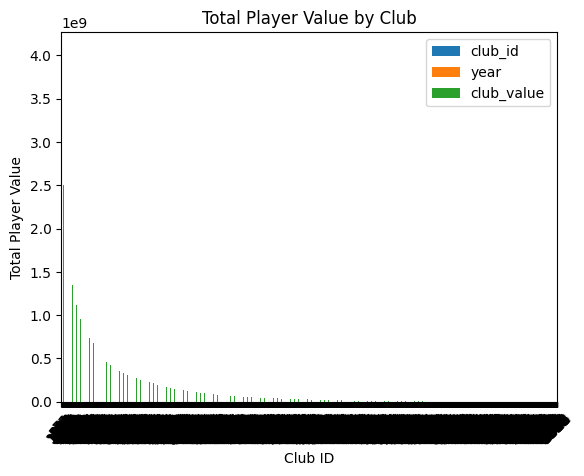

In [ ]:
# Plot the data in a bar diagram
plt.figure(figsize=(10, 6))
club_values_sorted.plot(kind='bar')
plt.title('Total Player Value by Club')
plt.xlabel('Club ID')
plt.ylabel('Total Player Value')
plt.xticks(rotation=45)

# Set the labels of the bars to the club names
plt.xticks(ticks=range(len(club_values_sorted)), labels=club_names[club_values_sorted.index], rotation=45)

plt.show()

# Plot the top 10 clubs in a bar diagram
plt.figure(figsize=(10, 6))
club_values_sorted.head(10).plot(kind='bar')
plt.title('Top 10 Clubs by Total Player Value')
plt.xlabel('Club ID')
plt.ylabel('Total Player Value')
plt.xticks(rotation=45)

# Set the labels of the bars to the club names
plt.xticks(ticks=range(len(club_values_sorted.head(10))), labels=club_names[club_values_sorted.head(10).index], rotation=45)

plt.show()

# Plot the bottom 10 clubs in a bar diagram
plt.figure(figsize=(10, 6))
club_values_sorted.tail(10).plot(kind='bar')
plt.title('Bottom 10 Clubs by Total Player Value')
plt.xlabel('Club ID')
plt.ylabel('Total Player Value')
plt.xticks(rotation=45)

# Set the labels of the bars to the club names
plt.xticks(ticks=range(len(club_values_sorted.tail(10))), labels=club_names[club_values_sorted.tail(10).index], rotation=45)

plt.show()

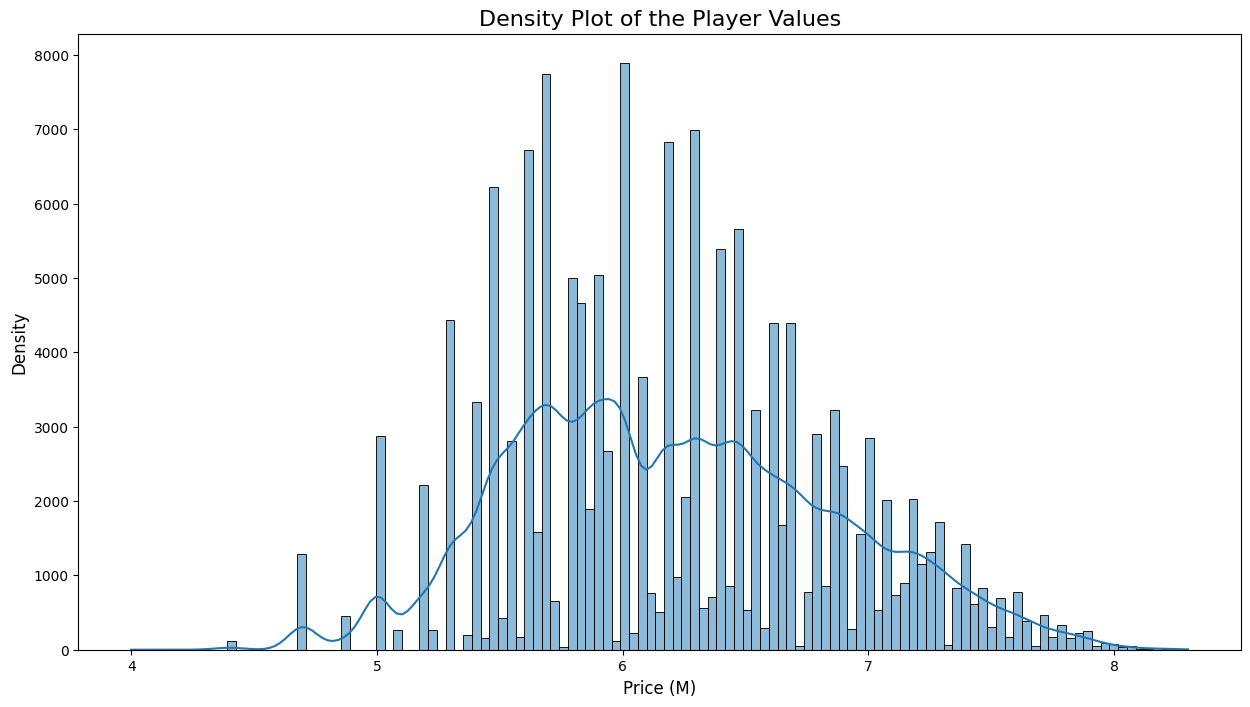

In [ ]:
file_path = '/work/cleaned_data_27.csv'
df = pd.read_csv(file_path, sep=",", encoding="UTF-8")
# Density Plot of the Prices with a logaritmic transformation on our target value
plt.figure(figsize=(15, 8))

df['log_market_value_base10'] = np.log10(df['market_value_in_eur'])
sns.histplot(df['log_market_value_base10'], kde=True)
plt.xlabel("Price (M)", fontsize=12)
plt.ylabel('Density',fontsize=12)
plt.title("Density Plot of the Player Values", fontsize=16)
plt.show()

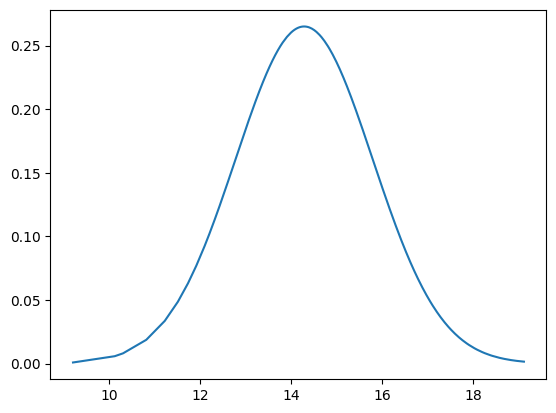

In [ ]:
from scipy.stats import norm 
import statistics 
df.sort_values(by='market_value_in_eur', inplace=True)

# If you want to reset the index after sorting
df.reset_index(drop=True, inplace=True)
df['log_market_value_base10'] = np.log(df['market_value_in_eur'])


x_axis = df['log_market_value_base10']

mean = statistics.mean(x_axis) 
sd = statistics.stdev(x_axis) 
  
plt.plot(x_axis, norm.pdf(x_axis, mean, sd)) 
plt.show() 

## Data distrubution

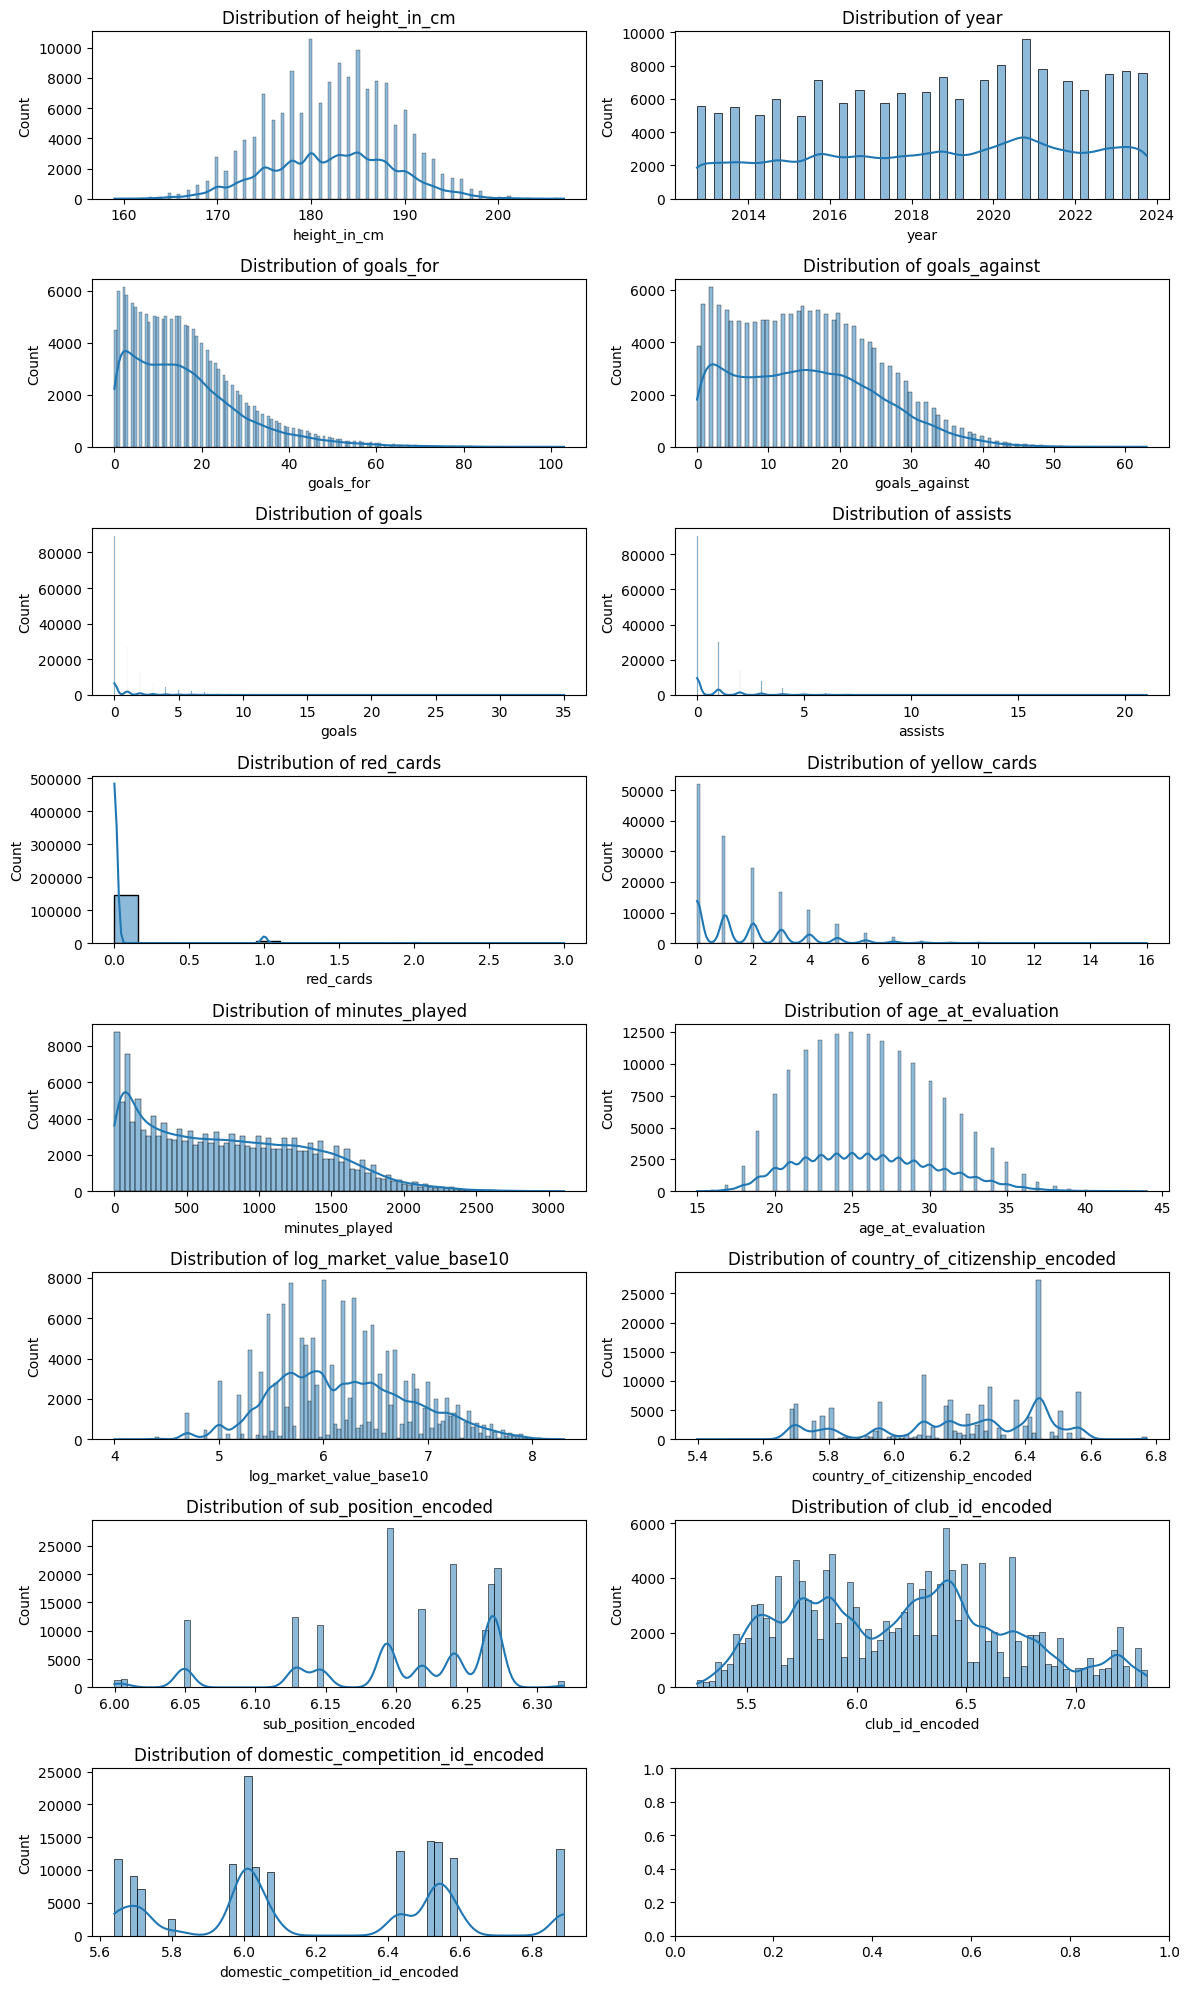

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


file_path = '/work/encoded_data_03_12.csv'
df = pd.read_csv(file_path, sep=",", encoding="UTF-8")


# Assuming your DataFrame is named 'df'
# Replace 'df' with your actual DataFrame name



# Set the number of columns for subplots
num_cols = len(df.columns)

# Calculate the number of rows needed based on the number of columns
num_rows = (num_cols + 1) // 2

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 2.5 * num_rows))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through each column and plot a histogram
for i, column in enumerate(df.columns):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


file_path = '/work/cleaned_data_03_12.csv'
df = pd.read_csv(file_path, sep=",", encoding="UTF-8")

# Assuming df_encoded is your preprocessed DataFrame containing player values and league information

# Get the unique leagues in the dataset
unique_leagues = df_encoded['league'].unique()

# Create a dictionary to store the number of players for each league
league_player_count = {}

# Iterate over each unique league
for league in unique_leagues:
    # Count the number of rows (players) belonging to the current league
    player_count = df_encoded[df_encoded['league'] == league].shape[0]
    
    # Store the player count for the current league in the dictionary
    league_player_count[league] = player_count

# Print the number of players for each league
for league, player_count in league_player_count.items():
    print(f"Number of players in {league}: {player_count}")



In [8]:
import pandas as pd
file_path = '/work/cleaned_data_03_12.csv'
df = pd.read_csv(file_path, sep=",", encoding="UTF-8")

# Initialize a dictionary to store the sum of unique values for each column
unique_sum = {}

# Iterate through each column and calculate the sum of unique values
for column in df.columns:
    unique_values = df[column].nunique()
    unique_sum[column] = unique_values

# Print the sum of unique values for each column
for column, total in unique_sum.items():
    print(f"Sum of unique values in column '{column}': {total}")


Sum of unique values in column 'player_id': 21226
Sum of unique values in column 'country_of_birth': 178
Sum of unique values in column 'country_of_citizenship': 171
Sum of unique values in column 'date_of_birth': 8049
Sum of unique values in column 'height_in_cm': 49
Sum of unique values in column 'sub_position': 13
Sum of unique values in column 'club_id': 941
Sum of unique values in column 'year': 23
Sum of unique values in column 'goals_for': 96
Sum of unique values in column 'goals_against': 61
Sum of unique values in column 'goals': 35
Sum of unique values in column 'assists': 22
Sum of unique values in column 'red_cards': 4
Sum of unique values in column 'yellow_cards': 16
Sum of unique values in column 'minutes_played': 2592
Sum of unique values in column 'market_value_in_eur': 227
Sum of unique values in column 'date': 1802
Sum of unique values in column 'age_at_evaluation': 30
Sum of unique values in column 'domestic_competition_id': 14
Sum of unique values in column 'log_mar

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=039d1f4a-fb47-4bbf-8592-3573ff918cac' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>